In [94]:
import numpy as np
import matplotlib.pyplot as plt

In [95]:
m = 20             # longitud del genotipo
pob_size = 50      # tamaño de la población 
a = -10            # valor mínimo de x
b = 10             # valor máximo de x
decimales=3        # número de decimales
n = 5              # variables a considerar
t = m * n          # total de bits 
epsilon = 1e-6     # cota de selección
proba_cruza = 0.8  # probabilidad de cruza
proba_muta = 1/t  # probabilidad de mutación
generaciones = 200 # número de generaciones
target = -1000         # objetivo de minimización 
s = 1.5

In [96]:
def gen_pop(pob_size, t):
    return np.random.randint(0, 2, (pob_size, t))

In [97]:
pob = gen_pop(pob_size, t)
print("Población:")
print(pob)

Población:
[[0 0 1 ... 1 0 0]
 [0 1 1 ... 0 1 0]
 [1 1 0 ... 1 1 0]
 ...
 [1 1 1 ... 1 0 1]
 [0 0 0 ... 1 0 0]
 [1 0 0 ... 1 1 0]]


In [98]:
def deco(genotipo): 
    powers = 2 ** np.arange(m-1, -1, -1)
    return np.dot(genotipo, powers)


In [99]:
def deco_ind(ind, m, a, b, decimales):
    decoded = []
    for i in range(n):
        start = i * m
        end = start + m
        gene = ind[start:end]
        valor_deco = deco(gene)
        x = a + valor_deco * (b - a) / (2**m - 1)
        decoded.append(round(x, decimales))
    return np.array(decoded)


In [100]:
def funcion(x):
    return np.sum(100 * (x[1:] - x[:-1]**2)**2 + (1 - x[:-1])**2)

In [101]:
def eva_funcion(ind, a, b, m, decimales):
    x = deco_ind(ind, a, b, m, decimales)
    return funcion(x)

In [102]:
def main():
    
    for idx, ind in enumerate(pob):
        decoded = deco_ind(ind, m, a, b, decimales)
        evaluation = eva_funcion(ind, m, a, b, decimales)
        print(f"\nIndividuo {idx+1}:")
        print("Genotipo:", ind)
        print("Fenotipo:", decoded)
        print("Evaluación f(x):", evaluation)

if __name__ == "__main__":
    main()



Individuo 1:
Genotipo: [0 0 1 0 1 0 0 1 0 1 1 1 0 0 1 0 0 0 0 0 1 0 1 0 0 0 1 1 0 0 1 1 1 0 1 0 1
 0 1 0 1 0 0 1 0 1 1 0 1 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0 0 1 0 0 0 0 1 0
 1 1 1 0 0 0 0 0 0 1 1 0 1 0 1 1 0 0 0 1 1 0 1 1 0 0]
Fenotipo: [-6.762  2.752  1.78  -9.293 -7.908]
Evaluación f(x): 1092362.538996555

Individuo 2:
Genotipo: [0 1 1 0 0 0 1 0 0 0 1 1 1 0 0 1 0 0 0 1 0 0 0 0 0 1 1 1 1 0 1 1 1 1 1 1 0
 0 1 0 1 1 0 0 1 1 1 0 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 0 0 0 1 1 1 0 1 1 1 1
 1 0 0 1 0 0 0 0 1 0 1 1 1 0 0 0 1 1 1 1 1 1 1 0 1 0]
Fenotipo: [-2.326 -9.395  6.16   2.792 -6.387]
Evaluación f(x): 839899.7295512499

Individuo 3:
Genotipo: [1 1 0 1 0 1 1 1 1 0 1 0 0 0 0 1 0 0 1 0 1 1 0 1 1 1 0 1 0 1 1 1 0 1 0 0 1
 1 0 1 0 1 0 1 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 0 1 1 0 1 0 0 1 0 0 1 0
 1 0 0 1 0 0 0 0 0 0 1 1 0 0 1 1 1 0 0 0 0 0 0 1 1 0]
Fenotipo: [ 6.846  7.301 -2.94  -2.946 -8.994]
Evaluación f(x): 517668.06731069135

Individuo 4:
Genotipo: [1 1 0 1 0 0 1 0 1 1 0 0 0 1 0 1 1 0 0 1 1 1 

In [103]:
def vasconcelos(pob, m, a, b, decimales, epsilon, s=1.5):
    aptituds = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
    N = len(pob)
    
    
    sorted_indices = np.argsort(aptituds)
    
   
    probas = np.zeros(N)
    for rank, idx in enumerate(sorted_indices):
        if N > 1:
            probas[idx] = (2 - s) / N + (2 * rank * (s - 1)) / (N * (N - 1))
        else:
            probas[idx] = 1
    probas = probas / np.sum(probas) 
    
    
    acc = np.cumsum(probas)
    r = np.random.rand()  
    selected_index = np.where(acc >= r)[0][0]
    return pob[selected_index], selected_index

In [104]:
def cruzar(padre1, padre2, prob_cruza):
    if np.random.rand() < prob_cruza:
        point = np.random.randint(1, len(padre1))
        hijo1 = np.concatenate((padre1[:point], padre2[point:]))
        hijo2 = np.concatenate((padre2[:point], padre1[point:]))
        return hijo1, hijo2
    else:
        return padre1.copy(), padre2.copy()

In [105]:
def mutar(ind, prob_muta):
    mutante = ind.copy()
    for i in range(len(mutante)):
        if np.random.rand() < prob_muta:
            mutante[i] = 1 - mutante[i]
    return mutante

Generación 1 - Mejor evaluación: 24527.255


Generación 2 - Mejor evaluación: 24127.131
Generación 3 - Mejor evaluación: 24527.255
Generación 4 - Mejor evaluación: 54823.36
Generación 5 - Mejor evaluación: 51707.638
Generación 6 - Mejor evaluación: 247505.195
Generación 7 - Mejor evaluación: 573427.089
Generación 8 - Mejor evaluación: 274102.063
Generación 9 - Mejor evaluación: 596807.037
Generación 10 - Mejor evaluación: 514760.942
Generación 11 - Mejor evaluación: 559089.11
Generación 12 - Mejor evaluación: 464195.862
Generación 13 - Mejor evaluación: 593555.795
Generación 14 - Mejor evaluación: 256593.241
Generación 15 - Mejor evaluación: 620311.793
Generación 16 - Mejor evaluación: 948240.207
Generación 17 - Mejor evaluación: 1063290.481
Generación 18 - Mejor evaluación: 1159013.414
Generación 19 - Mejor evaluación: 1433791.455
Generación 20 - Mejor evaluación: 1683106.441
Generación 21 - Mejor evaluación: 919541.846
Generación 22 - Mejor evaluación: 1305803.65
Generación 23 - Mejor evaluación: 1777376.714
Generación 24 - Mej

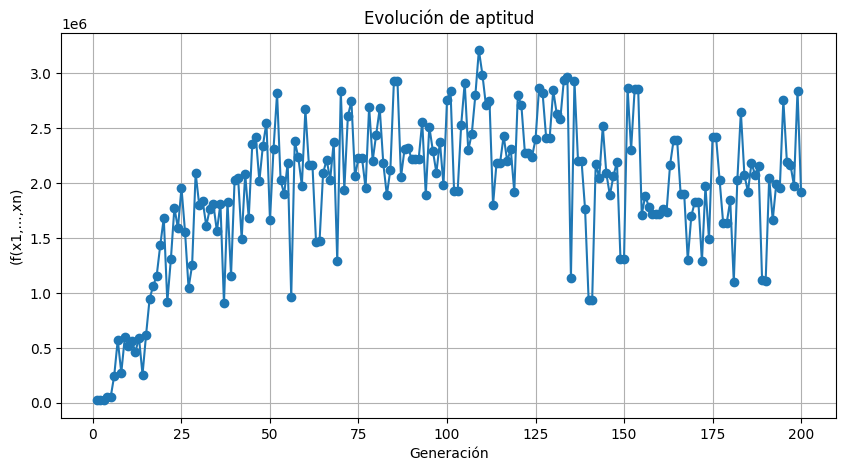

In [106]:
def AG(pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target):
    pob = gen_pop(pob_size, t)
    
    mejor_hijo = None
    mejor_aptitud = np.inf
    generacion = 0
    h = [] # diccionario con el historial de aptitudes
     
    while generacion < generaciones:
        generacion += 1
        
        evaluar = [eva_funcion(ind, m, a, b, decimales) for ind in pob]
        mejor_ahora = min(evaluar)
        mejor_var = evaluar.index(mejor_ahora)

        h.append(mejor_ahora) 

        if mejor_ahora < mejor_aptitud:
            mejor_aptitud = mejor_ahora
            mejor_hijo = pob[mejor_var]
        
        print(f"Generación {generacion} - Mejor evaluación: {round(mejor_ahora, decimales)}")
        
        # condición de paro
        if round(mejor_ahora, decimales) <= target:
            print("se ha alcanzado el objetivo.")
            
            break
        
        # nueva población
        new_pob = []
        while len(new_pob) < pob_size:
            
            padre1, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
            padre2, _ = vasconcelos(pob, m, a, b, decimales, epsilon)
            
            
            hijo1, hijo2 = cruzar(padre1, padre2, proba_cruza)
            hijo1 = mutar(hijo1, proba_muta)
            hijo2 = mutar(hijo2, proba_muta)
            
            new_pob.append(hijo1)
            if len(new_pob) < pob_size:
                new_pob.append(hijo2)
        pob = np.array(new_pob)
    
    mejor_calificado = eva_funcion(mejor_hijo, m, a, b, decimales)
    return mejor_hijo, mejor_calificado, mejor_aptitud, generacion, h

def main():
    
    mejor_ind, mejor_calificado, mejor_api, generacion, h= AG( pob_size, m, a, b, decimales, epsilon, proba_cruza, proba_muta, generaciones, target)
    
    print("\nResultado final:")
    print("Generaciones:", generacion)
    print("Mejor genotipo:", mejor_ind)
    print("Mejor fenotipo (x1,...,xn):", mejor_calificado)
    print("Mejor evaluación f(x1,...,xn):", round(mejor_api, decimales))

    plt.figure(figsize=(10, 5))
    plt.plot(range(1, len(h) + 1), h, marker='o', linestyle='-')
    plt.xlabel("Generación")
    plt.ylabel("(f(x1,...,xn)")
    plt.title("Evolución de aptitud")
    plt.grid(True)
    plt.show()

if __name__ == "__main__":
    main()
